**🌟 Exercise 1: Duplicate Detection and Removal**

Instructions

Objective: Identify and remove duplicate entries in the Titanic dataset.
* Load the Titanic dataset.

* Identify if there are any duplicate rows based on all columns.

* Remove any duplicate rows found in the dataset.
* Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.

In [1]:
import pandas as pd

# Load the Titanic dataset.
df = pd.read_csv('train.csv')

# Identify if there are any duplicate rows based on all columns.
rows_before = df.shape[0]
rows_before

# Remove any duplicate rows found in the dataset.
df.duplicated().sum()

# Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.
rows_after = df.shape[0]
rows_after

print("Rows before removing duplicates:", rows_before)
print("Rows after removing duplicates:", rows_after)
print("Duplicates removed:", rows_before - rows_after)





Rows before removing duplicates: 891
Rows after removing duplicates: 891
Duplicates removed: 0


**🌟 Exercise 2: Handling Missing Values**

Instructions

* Identify columns in the Titanic dataset with missing values.

* Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
* Apply each strategy to different columns based on the nature of the data.

In [3]:
# Identify columns in the Titanic dataset with missing values.
df.isnull().sum()

df = df.drop(columns=['Cabin'])

from sklearn.impute import SimpleImputer

age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify no missing values remain
df.isnull().sum()



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Missing values were handled using different strategies depending on the column.
Columns with too many missing values were removed, numerical values were filled using the median, and categorical values were filled using the most frequent value. After preprocessing, no missing values remained in the dataset.

**🌟 Exercise 3: Feature Engineering**

Instructions

* Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
* Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
* You will encode new categorical features (like Title) here, but do not scale numerical features yet — that will come after outlier handling.

In [4]:
# Create Family Size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df[['SibSp', 'Parch', 'FamilySize']].head()

# Create IsAlone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df[['FamilySize', 'IsAlone']].head()

# Extract title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^.]+)\.', expand=False)

df['Title'].value_counts()

# Simplify titles
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Ms': 'Mrs',
    'Don': 'Rare',
    'Lady': 'Rare',
    'Sir': 'Rare',
    'Capt': 'Rare',
    'the Countess': 'Rare',
    'Jonkheer': 'Rare'
}

df['Title'] = df['Title'].map(title_mapping)

df['Title'].value_counts()

# Encode Sex
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

df[['Sex', 'Sex_encoded']].head()

# One-hot encode Title
title_dummies = pd.get_dummies(df['Title'], prefix='Title')

df = pd.concat([df, title_dummies], axis=1)

df.head()

df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title',
       'Sex_encoded', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare'],
      dtype='object')

**🌟 Exercise 4: Outlier Detection and Handling**

Goal: Detect and cap or transform outliers in columns like Fare and Age.

1. Visualize distributions using boxplots or histograms to identify potential outliers.
2. Use IQR or Z-score methods to detect them.
3. Handle outliers with:
* Quantile capping (e.g. 0.98)
* Log transformation
* Row removal
4. Compare the dataset before and after treatment.

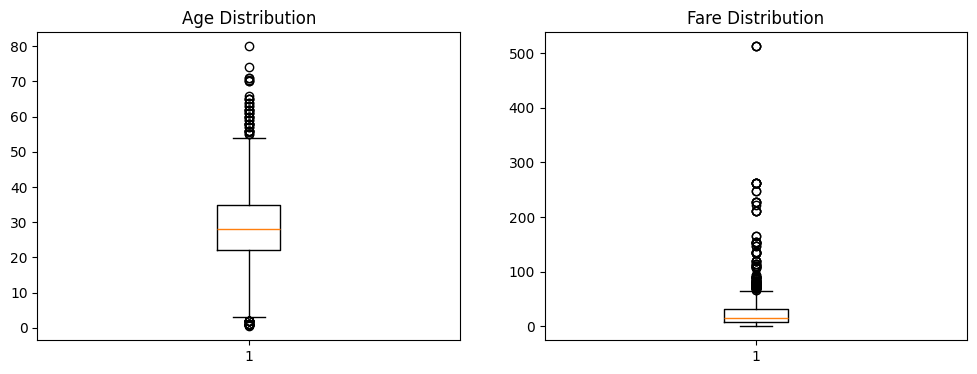

Outliers detected in Fare: 116
Fare cap value (98th percentile): 211.3375
Max Fare before: 512.3292
Max Fare after: 211.3375


NameError: name 'titanic_raw' is not defined

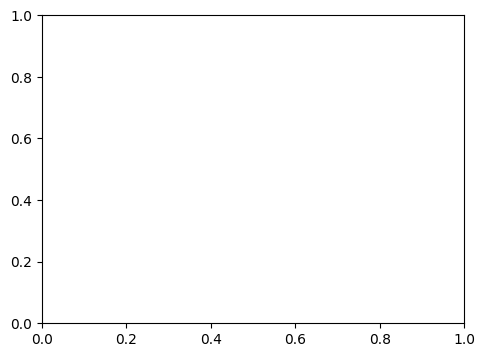

In [5]:
import matplotlib.pyplot as plt

# 1. Visualize distributions using boxplots or histograms to identify potential outliers.
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.boxplot(df['Age'].dropna())
plt.title('Age Distribution')

plt.subplot(1,2,2)
plt.boxplot(df['Fare'].dropna())
plt.title('Fare Distribution')

plt.show()

# 2. Use IQR or Z-score methods to detect them.
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_fare = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

print(f"Outliers detected in Fare: {len(outliers_fare)}")

# 3. Handle outliers with:
# * Quantile capping (e.g. 0.98)
# * Log transformation
# * Row removal

fare_cap = df['Fare'].quantile(0.98)

print(f"Fare cap value (98th percentile): {fare_cap}")
print(f"Max Fare before: {df['Fare'].max()}")

df['Fare'] = df['Fare'].clip(upper=fare_cap)

print(f"Max Fare after: {df['Fare'].max()}")

# 4. Compare the dataset before and after treatment.
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(titanic_raw['Fare'], bins=50)
plt.title('Fare Before Capping')

plt.subplot(1,2,2)
plt.hist(df['Fare'], bins=50)
plt.title('Fare After Capping')

plt.show()


**🌟 Exercise 5: Data Standardization and Normalization**

Goal: Scale numerical features to prepare for modeling.
* Use StandardScaler (mean = 0, std = 1) for normally distributed features.
* Use MinMaxScaler (range [0, 1]) for features that are skewed or bounded.

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Use StandardScaler (mean = 0, std = 1) for normally distributed features.
scaler_age = StandardScaler()
df['Age_scaled'] = scaler_age.fit_transform(df[['Age']])

df[['Age', 'Age_scaled']].head()

# Use MinMaxScaler (range [0, 1]) for features that are skewed or bounded.
scaler_fare = MinMaxScaler()
df['Fare_scaled'] = scaler_fare.fit_transform(df[['Fare']])

df[['Fare', 'Fare_scaled']].head()

print("Age_scaled -> mean:", df['Age_scaled'].mean(), "std:", df['Age_scaled'].std())
print("Fare_scaled -> min:", df['Fare_scaled'].min(), "max:", df['Fare_scaled'].max())


Age_scaled -> mean: 2.272779794518839e-16 std: 1.000561640033049
Fare_scaled -> min: 0.0 max: 1.0


**🌟 Exercise 6: Feature Encoding**

Goal: Finalize categorical variable encoding.

1. Identify remaining categorical columns (e.g. Sex, Embarked, Title).
2. Apply:
* One-Hot Encoding for nominal variables.
* Label Encoding if any ordinal variables remain.
3. Merge encoded columns back into the main dataset.

In this exercise, all categorical variables were already encoded into numerical format.
Sex was label encoded and Title and Embarked were one-hot encoded, so the dataset is ready for modeling.

**🌟 Exercise 7: Data Transformation for Age Feature**

Goal: Create and encode age groups.
* Use pd.cut() to create bins for life stages (e.g. child, teen, adult, senior).
* Apply one-hot encoding using pd.get_dummies().

In [7]:
# Use pd.cut() to create bins for life stages.
# Create age groups
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Check result
df[['Age', 'AgeGroup']].head()

# Apply one-hot encoding using pd.get_dummies().
# One-hot encoding of AgeGroup
agegroup_dummies = pd.get_dummies(df['AgeGroup'], prefix='AgeGroup')

# Add to dataframe
df = pd.concat([df, agegroup_dummies], axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Mr,Title_Mrs,Title_Rare,Age_scaled,Fare_scaled,AgeGroup,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,True,False,False,-0.565736,0.034305,Adult,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,True,False,0.663861,0.337296,Adult,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,-0.258337,0.037499,Adult,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,False,True,False,0.433312,0.251257,Adult,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,True,False,False,0.433312,0.038091,Adult,False,False,True,False
